In [193]:
import numpy as np
from scipy.constants import golden_ratio
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt
import librosa
import soundfile as sf
%matplotlib inline

In [231]:
width = 6
height = 6 / golden_ratio / 2
figsize = (width, height)
print(figsize)
path_to_figs = '../../figures/processing/py-'


plt.rcParams.update({'font.size': 14})


(6, 1.8541019662496845)


# Sampling

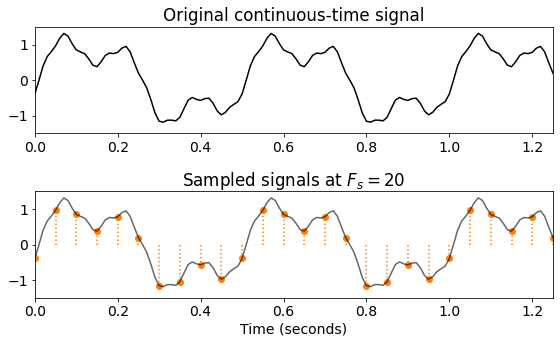

In [233]:
def generate_function(Fs, dur=1):
    """Generate example function

    Notebook: C2/C2S2_DigitalSignalSampling.ipynb

    Args:
        Fs: Sampling rate
        dur: Duration (in seconds) of signal to be generated

    Returns:
        x: Signal
        t: Time axis (in seconds)
    """    
    N = int(Fs * dur)
    t = np.arange(N) / Fs    
    x = 1 * np.sin(2 * np.pi * (2 * t - 0))
    x += 0.5 * np.sin(2 * np.pi * (6 * t - 0.1))
    x += 0.1 * np.sin(2 * np.pi * (20 * t - 0.2))
    return x, t

def sampling_equidistant(x_1, t_1, Fs_2, dur=None):
    """Equidistant sampling of interpolated signal

    Notebook: C2/C2S2_DigitalSignalSampling.ipynb

    Args:
        x_1: Signal to be interpolated and sampled
        t_1: Time axis (in seconds) of x_1
        Fs_2: Sampling rate used for equidistant sampling
        dur: Duration (in seconds) of sampled signal

    Returns:
        x_2: Sampled signal
        t_2: time axis (in seconds) of sampled signal
    """     
    if dur==None:
        dur = len(t_1)*t_1[1]
    N = int(Fs_2 * dur)
    t_2 = np.arange(N) / Fs_2
    x_2 = interp1d(t_1, x_1, kind='linear', fill_value='extrapolate')(t_2)
    return x_2, t_2
    
Fs_1 = 100
x_1, t_1 = generate_function(Fs=Fs_1, dur=2)

Fs_2 = 20
x_2, t_2 = sampling_equidistant(x_1, t_1, Fs_2)
    
def reconstruction_sinc(x, t, t_sinc):
    """Reconstruction from sampled signal using sinc-functions

    Notebook: C2/C2S2_DigitalSignalSampling.ipynb

    Args:
        x: Sampled signal
        t: Equidistant discrete time axis (in seconds) of x
        t_sinc: Equidistant discrete time axis (in seconds) of signal to be reconstructed

    Returns:
        x_sinc: Reconstructed signal having time axis t_sinc
    """    
    Fs = 1/t[1]
    x_sinc = np.zeros(len(t_sinc))
    for n in range(0, len(t)): 
        x_sinc += x[n] * np.sinc(Fs * t_sinc - n)
    return x_sinc

def plot_signal_reconstructed(t_1, x_1, t_2, x_2, t_sinc, x_sinc):
    plt.plot(t_1, x_1, 'k', linestyle='-', label='Orignal signal')
    plt.stem(t_2, x_2, linefmt='C0:', markerfmt='C0.', basefmt='None', label='Samples', use_line_collection=True)
    plt.plot(t_1, x_sinc, 'C1', label='Reconstructed signal')

plt.figure(figsize=(8,5))
    
plt.subplot(211)
plt.plot(t_1, x_1, 'k')
plt.title(r'Original continuous-time signal')
plt.ylim([-1.5, 1.5])
plt.xlim(0, 1.25)

plt.subplot(212)
plt.stem(t_2, x_2, linefmt='C1:', markerfmt='C1o', basefmt='None', use_line_collection=True)
plt.plot(t_1, x_1, 'k', linestyle='-', alpha=.6)
plt.title(r'Sampled signals at $F_s = %.0f$'%Fs_2)
plt.xlabel('Time (seconds)')
plt.ylim([-1.5, 1.5])
plt.xlim(0, 1.25)

plt.tight_layout()
plt.savefig(path_to_figs + 'py_processing.pdf', dpi=300)
plt.show()

# Time-Frequency

16000


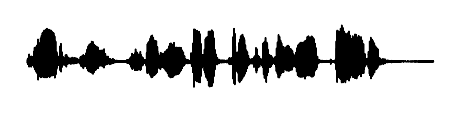

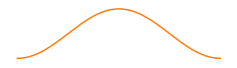

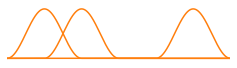

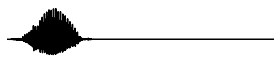

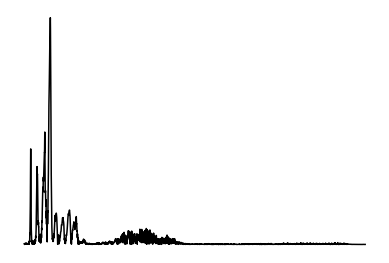

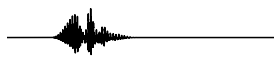

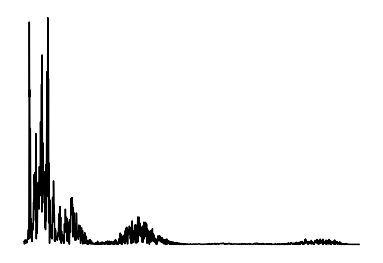

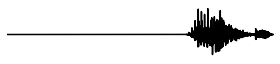

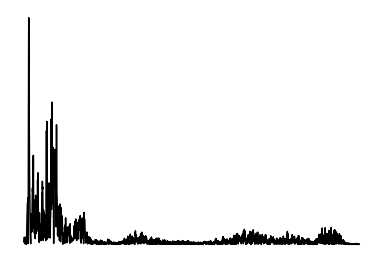

In [191]:
import scipy.signal

wav, Fs = sf.read('../../media/audio/empress.wav')
print(Fs)
wav = wav - np.mean(wav)
x = wav / np.max(np.abs(wav))
N = len(x)
t = np.arange(N)/Fs


plt.figure(figsize=(8,2))
plt.plot(t, x, 'k')
plt.ylim([-1.5, 1.5])
plt.axis('off')
plt.savefig(path_to_figs + 'waveform.png', dpi=300)
plt.show()

H = 4096
w_type = 'hann'
w = scipy.signal.get_window(w_type, H) 
tw = np.arange(H)/Fs

plt.figure(figsize=(4,1))
plt.plot(w, 'C1')
plt.axis('off')
plt.savefig(path_to_figs + 'window_hann.png', dpi=300)
plt.show()

w1 = np.concatenate([w, np.zeros(N-H)])
w2 = np.concatenate([np.zeros(H//2), w, np.zeros(N-H//2-H)])
w3 = np.concatenate([np.zeros(2*H), w, np.zeros(N-2*H-H)])

ws = [w1, w2, w3]

plt.figure(figsize=(4,1))
for w in ws:
    plt.plot(w, 'C1')
plt.axis('off')
plt.xlim([0,3*H])
plt.savefig(path_to_figs + 'windows.png', dpi=300)
plt.show()

for i, w in enumerate(ws):
    plt.figure(figsize=(4,1))
    plt.plot(w*x, 'k')
    plt.axis('off')
    plt.xlim([0, 3*H])
    plt.tight_layout()
    plt.savefig(path_to_figs + 'time_segment-%d.png' % i, dpi=300)
    plt.show()

    X = np.abs(np.fft.fft(w*x)) / Fs
    freq = np.fft.fftfreq(N, d=1/Fs)
    X = X[:N//2]
    freq = freq[:N//2]
    
    plt.plot(freq, X, c='k')
    plt.tight_layout()
    plt.axis('off')
    plt.savefig(path_to_figs + 'freq_segment-%d.png' % i, dpi=300)
    plt.show()
    

## Spectrogram

Computation of T_coef agrees: True
Computation of F_coef agrees: True


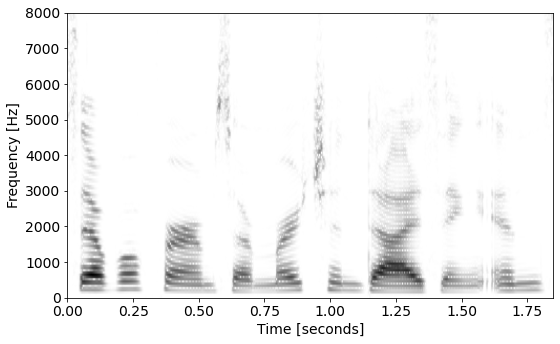

In [234]:
N = 256
H = 64
color = 'gray_r' 

path_to_wav = '../../media/audio/anechoic.wav'
Fs = 16000
x, Fs = librosa.load(path_to_wav, sr=Fs)

X = librosa.stft(x[int(0.5*Fs):int(2.35*Fs)], n_fft=N, hop_length=H, win_length=N, window='hann', pad_mode='constant', center=True)
Y = np.log(1 + 100 * np.abs(X) ** 2)

T_coef = np.arange(X.shape[1]) * H / Fs
T_coef_librosa = librosa.frames_to_time(np.arange(X.shape[1]), sr=Fs, hop_length=H)
print('Computation of T_coef agrees:', np.allclose(T_coef, T_coef_librosa))

K = N // 2
F_coef = np.arange(K+1) * Fs / N
F_coef_librosa = librosa.fft_frequencies(sr=Fs, n_fft=N)
print('Computation of F_coef agrees:', np.allclose(F_coef, F_coef_librosa))


plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8, 5))
extent = [T_coef[0], T_coef[-1], F_coef[0], F_coef[-1]]
plt.imshow(Y, cmap=color , aspect='auto', origin='lower', extent=extent)
plt.xlabel('Time [seconds]')
plt.ylabel('Frequency [Hz]')
plt.tight_layout()
plt.savefig(path_to_figs + 'speech_spectrogram.pdf', dpi=300)
plt.show()

